# [LO 1, LO 2 – 30 Poin] Buatlah model machine learning yang berisi proses pre-processing machine learning, training, dan hasil dari perbadingan 2 algoritma machine learning yaitu Random Forest dan Xgboost. Ambil algoritma terbaik dan simpan dengan menggunakan pickle. Seluruh proses disimpan dengan extension .ipynb

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv("Dataset_B_hotel.csv")

In [52]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## EDA

In [53]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,35005.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,34643.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.031281,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.447208,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.174079,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.158417,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.275000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Dari hasil di atas, dapat dilihat bahwa ada beberapa kolom seperti type_of_meal_plan dan required_car_parking_space yang memiliki missing value

### Memisahkan categorical columns dan numerical columns bedasarkan datatype dari kolom tersebut

In [55]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [56]:
cols = df.columns

num_cols = ['no_of_adults', 'no_of_children', 'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations',
            'avg_price_per_room', 'no_of_previous_bookings_not_canceled', 'no_of_special_requests']
cat_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'repeated_guest', 'booking_status']

print(num_cols)
print(cat_cols)



['no_of_adults', 'no_of_children', 'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_previous_bookings_not_canceled', 'no_of_special_requests']
['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'repeated_guest', 'booking_status']


### Cek Duplikat Data

In [57]:
df.duplicated().sum()

0

### Melakukan pengecekan datatype dan dirty data dengan melihat unique value dan value counts dari masing - masing kolom

In [58]:
for i in cols :
    print(i, df[i].unique())

Booking_ID ['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
no_of_adults [2 1 3 0 4]
no_of_children [ 0  2  1  3 10  9]
no_of_weekend_nights [1 2 0 4 3 6 5 7]
no_of_week_nights [ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]
type_of_meal_plan ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' nan 'Meal Plan 3']
required_car_parking_space [ 0. nan  1.]
room_type_reserved ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
lead_time [224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74
 143 177  18 267 155  46 128  20  40 196 188  17 110  68  73  92 171 134
 320 118 189  16  24   8  10 182 116 123 105 443 317 286 148  14  85  25
  28  80  11 162  82  27 245 266 112  88  69 273   4  97  31  62 197 280
 185 160 104  22 292 109 126 303  81  54  15 161 147  

In [59]:
for i in cols:
    print(df[i].value_counts())

Booking_ID
INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: count, Length: 36275, dtype: int64
no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64
no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64
no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64
no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64
type_of_meal_plan
Meal Plan 1     27157
Not Selected     4986
Meal Plan 2      3220
Meal Plan 3         5
Name: count, dtype: int64
required_car_parking_space
0.0    33910
1.0     1095
Name: c

In [60]:
df.isna().sum()

Booking_ID                                 0
no_of_adults                               0
no_of_children                             0
no_of_weekend_nights                       0
no_of_week_nights                          0
type_of_meal_plan                        907
required_car_parking_space              1270
room_type_reserved                         0
lead_time                                  0
arrival_year                               0
arrival_month                              0
arrival_date                               0
market_segment_type                        0
repeated_guest                             0
no_of_previous_cancellations               0
no_of_previous_bookings_not_canceled       0
avg_price_per_room                      1632
no_of_special_requests                     0
booking_status                             0
dtype: int64

In [61]:
print(df['type_of_meal_plan'].isna().mean() * 100) 
print(df['required_car_parking_space'].isna().mean() * 100) 
print(df['avg_price_per_room'].isna().mean() * 100) 

2.5003445899379737
3.5010337698139216
4.498966230186078


Dari hasil di atas, dapat dilihat bahwa **tidak terdapat dirty data**. Namun dapat dilihat bahwa terdapat missing value di kolom type_of_meal_plan, required_car_parking_space dan avg_price_per_room.

Dikarenakan jumlah missing value tidak begitu besar(persentase missing value dibawah 5%), akan dilakukan imputation.

### Visualisasi target data

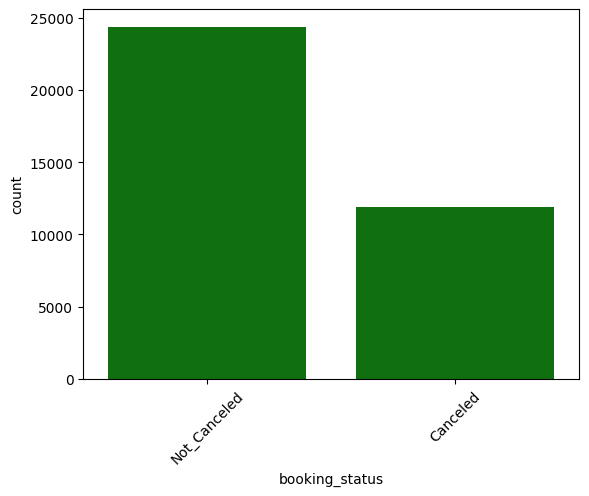

In [62]:
sns.countplot(x='booking_status', data=df, color = 'green')
plt.xticks(rotation = 45)
plt.show()

Dari plot di atas dapat dilihat bahwa data kita lumayan imbalanced (lebih banyak data not canceled dibanding data canceled)

### Split data set menjadi train data dan test data

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x = df.drop(['booking_status', 'Booking_ID'], axis = 1)
y = df['booking_status']

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [66]:
x_train.shape

(29020, 17)

In [67]:
x_test.shape

(7255, 17)

### Distribution Checking

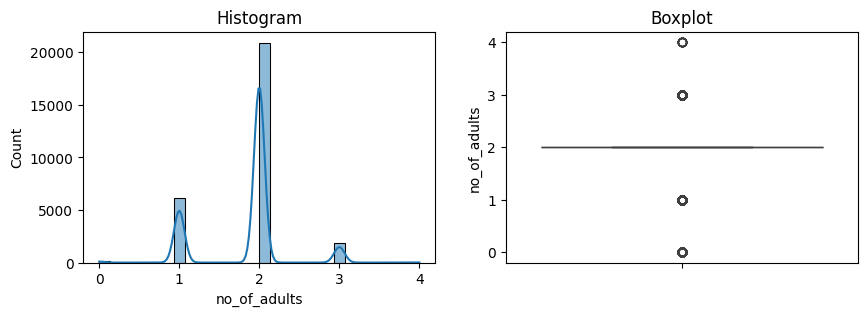

Skewness: -0.3408381780050516
Kurtosis: 0.8311984419918854


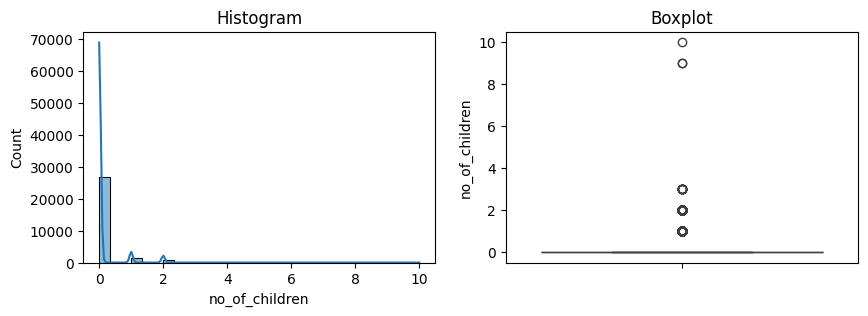

Skewness: 4.844411575850196
Kurtosis: 41.343625201428075


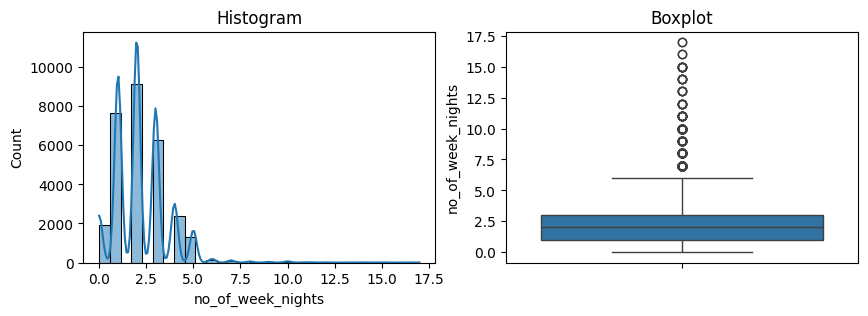

Skewness: 1.542808091718338
Kurtosis: 7.396462608464434


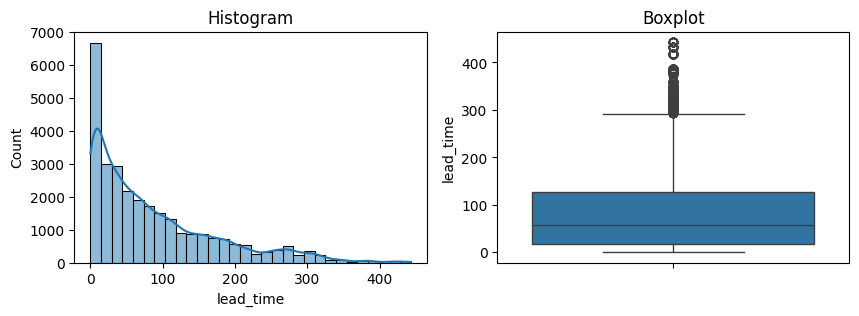

Skewness: 1.289143998432937
Kurtosis: 1.1732211565755146


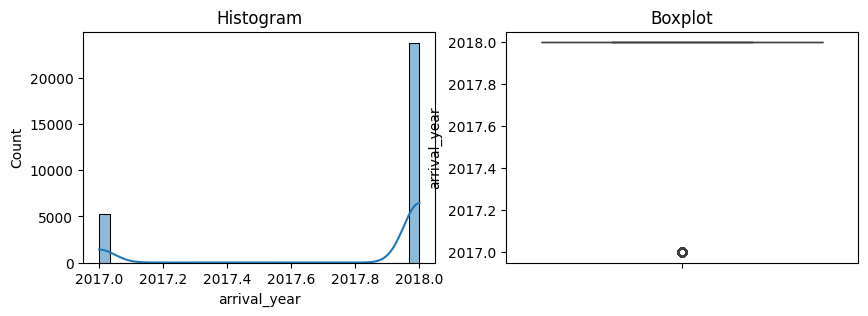

Skewness: -1.6697735533409426
Kurtosis: 0.7881980357097773


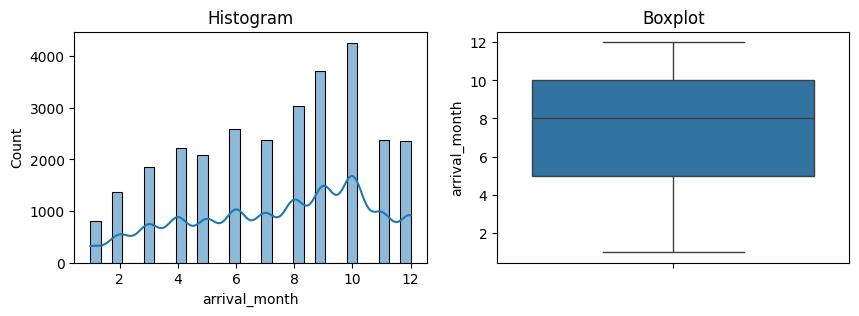

Skewness: -0.34671105911372574
Kurtosis: -0.9286968773170052


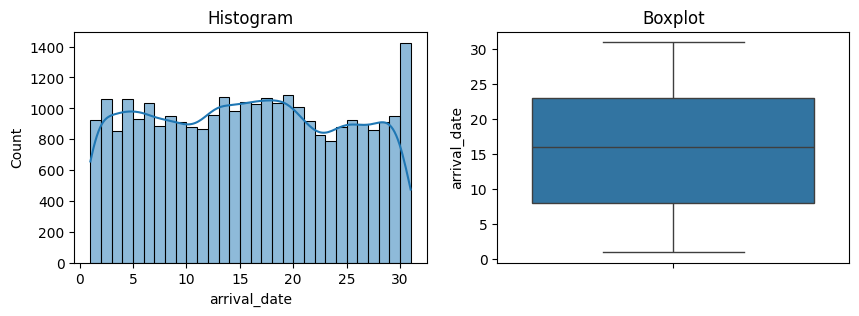

Skewness: 0.027334940856532163
Kurtosis: -1.1569711779247427


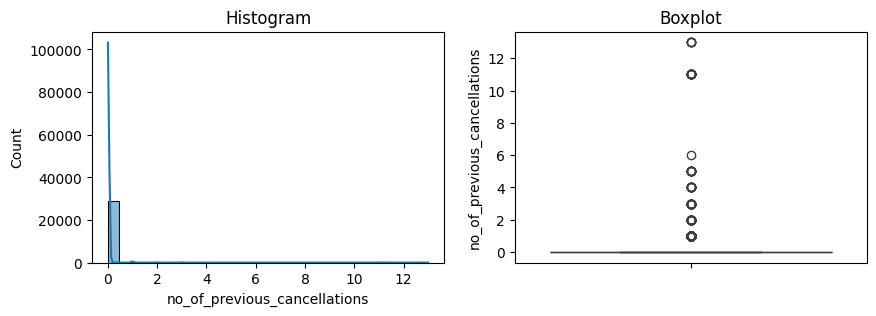

Skewness: 24.94098438237305
Kurtosis: 715.3845119379712


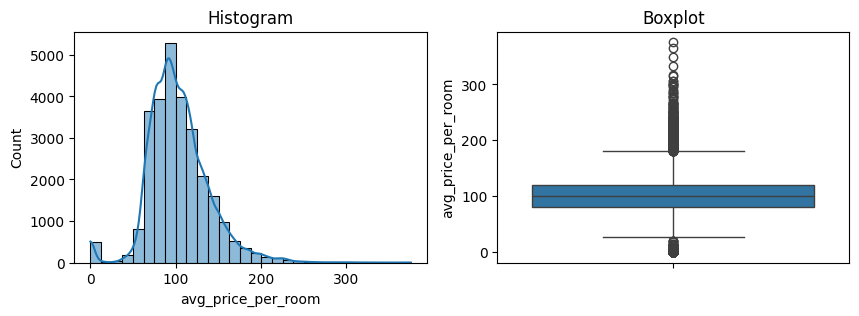

Skewness: 0.6154437617138082
Kurtosis: 2.604824007680892


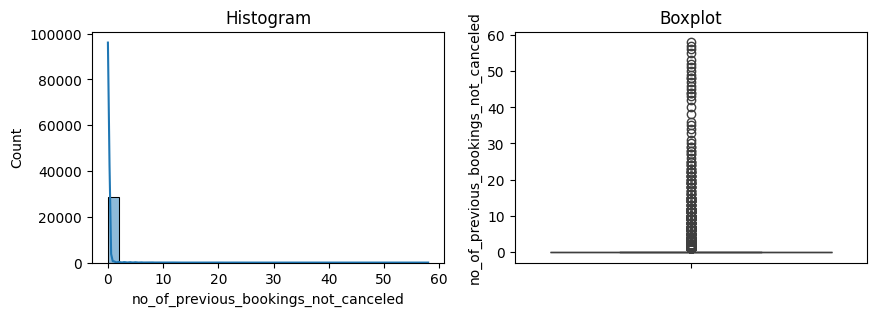

Skewness: 19.509732675794666
Kurtosis: 467.9094027184032


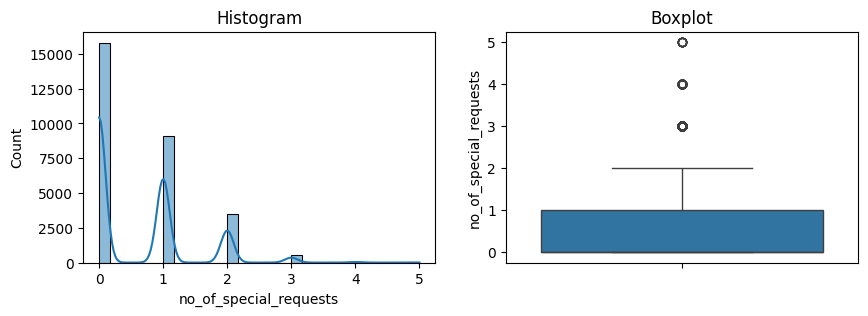

Skewness: 1.1504482948802144
Kurtosis: 0.924912645245112


In [68]:
def check_dist(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 3))

        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30, kde=True)
        plt.title('Histogram')

        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[col].skew())
        print('Kurtosis:', df[col].kurt())

check_dist(x_train, num_cols)

Dari histogram, boxplot dan nilai skewness di atas dapat dilihat bahwa terdapat beberapa kolom dengan distribusi **tidak normal**.

Untuk kolom yang memiliki missing value (avg_price_per_room), distribusinya tidak normal dengan skewness bernilai 0.6. Sehingga untuk imputation missing value akan digunakan nilai **median**

### Missing Value Imputation
Imputasi x_train dan x_test dengan menggunakan nilai median dari x_train

In [69]:
avgPrice_median = np.nanmedian(x_train['avg_price_per_room'])
avgPrice_median

99.9

In [70]:
x_train['avg_price_per_room'].fillna(avgPrice_median, inplace= True)
x_test['avg_price_per_room'].fillna(avgPrice_median, inplace = True)

Imputasi kolom categorical (type_of_meal_plan dan required_car_parking_space) dengan modusnya

In [71]:
typeMeal_mode = x_train['type_of_meal_plan'].mode()[0]
typeMeal_mode

'Meal Plan 1'

In [72]:
requiredCar_mode = x_train['required_car_parking_space'].mode()[0]
requiredCar_mode

0.0

In [73]:
x_train['type_of_meal_plan'].fillna(typeMeal_mode, inplace = True)
x_test['type_of_meal_plan'].fillna(typeMeal_mode, inplace = True)

x_train['required_car_parking_space'].fillna(requiredCar_mode, inplace = True)
x_test['required_car_parking_space'].fillna(requiredCar_mode, inplace = True)

In [74]:
x_train.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
dtype: int64

In [75]:
x_test.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
dtype: int64

## Encoding
Encoding dilakukan pada kolom kategorical yang memiliki datatype berupa string (type_of_meal_plan, room_type_reserved dan market_segment_type)

In [76]:
print(x_train['type_of_meal_plan'].unique())
print(x_train['room_type_reserved'].unique())
print(x_train['market_segment_type'].unique())

['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
['Room_Type 1' 'Room_Type 6' 'Room_Type 5' 'Room_Type 4' 'Room_Type 2'
 'Room_Type 7' 'Room_Type 3']
['Online' 'Offline' 'Corporate' 'Complementary' 'Aviation']


Dikarenakan semua valuenya tidak ordinal, saya akan menggunakan OneHotEncoder

In [77]:
from sklearn.preprocessing import OneHotEncoder

In [78]:
onne = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
onnecol = ["type_of_meal_plan", "room_type_reserved", "market_segment_type"]
onned_train = onne.fit_transform(x_train[onnecol])
onned_test = onne.transform(x_test[onnecol])

onned_train_df = pd.DataFrame(onned_train, columns=onne.get_feature_names_out(onnecol))
onned_test_df = pd.DataFrame(onned_test, columns=onne.get_feature_names_out(onnecol))

x_train_final = pd.concat([x_train.drop(columns=onnecol).reset_index(drop=True), onned_train_df.astype('int')], axis=1)
x_test_final = pd.concat([x_test.drop(columns=onnecol).reset_index(drop=True), onned_test_df.astype('int')], axis=1)


In [147]:
import pickle as pkl

In [148]:
filename_subs = 'oneHot_encode.pkl'
pkl.dump(onne, open(filename_subs, 'wb'))

In [79]:
x_train_final.iloc[50]

no_of_adults                               2.0
no_of_children                             2.0
no_of_weekend_nights                       0.0
no_of_week_nights                          1.0
required_car_parking_space                 0.0
lead_time                                 12.0
arrival_year                            2018.0
arrival_month                              8.0
arrival_date                              19.0
repeated_guest                             0.0
no_of_previous_cancellations               0.0
no_of_previous_bookings_not_canceled       0.0
avg_price_per_room                       220.0
no_of_special_requests                     0.0
type_of_meal_plan_Meal Plan 1              1.0
type_of_meal_plan_Meal Plan 2              0.0
type_of_meal_plan_Meal Plan 3              0.0
type_of_meal_plan_Not Selected             0.0
room_type_reserved_Room_Type 1             0.0
room_type_reserved_Room_Type 2             0.0
room_type_reserved_Room_Type 3             0.0
room_type_res

Untuk kolom target (Booking_status) saya akan melakukan Binary Encoding

In [80]:
y_train.replace('Canceled', 1,inplace=True)
y_train.replace('Not_Canceled', 0,inplace=True)


In [81]:
y_test.replace('Canceled', 1 , inplace=True)
y_test.replace('Not_Canceled', 0 , inplace=True)

## Normalisasi
Normalisasi akan dilakukkan ke numerical columns. Untuk kolom yang berdistribusi normal akan menggunakan StandardScaler dan untuk kolom yang skewed akan menggunakan RobustScaler

In [82]:
normdist = ['no_of_adults', 'arrival_month', 'arrival_date']
nonnormdist = [col for col in num_cols if col not in normdist]

In [83]:
print(normdist)
print(nonnormdist)

['no_of_adults', 'arrival_month', 'arrival_date']
['no_of_children', 'no_of_week_nights', 'lead_time', 'arrival_year', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_previous_bookings_not_canceled', 'no_of_special_requests']


In [84]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [85]:
std = StandardScaler()
rob = RobustScaler()
x_train_final[normdist] = std.fit_transform(x_train_final[normdist])
x_test_final[normdist] = std.transform(x_test_final[normdist])
x_train_final[nonnormdist] = rob.fit_transform(x_train_final[nonnormdist])
x_test_final[nonnormdist] = rob.transform(x_test_final[nonnormdist])

In [149]:
filename_subs = 'normdist_normalization.pkl'
pkl.dump(std, open(filename_subs, 'wb'))

In [150]:
filename_subs = 'nonnormdist_normalization.pkl'
pkl.dump(rob, open(filename_subs, 'wb'))

In [86]:
x_train_final.iloc[50]

no_of_adults                            0.300222
no_of_children                          2.000000
no_of_weekend_nights                    0.000000
no_of_week_nights                      -0.500000
required_car_parking_space              0.000000
lead_time                              -0.418182
arrival_year                            0.000000
arrival_month                           0.190684
arrival_date                            0.389162
repeated_guest                          0.000000
no_of_previous_cancellations            0.000000
no_of_previous_bookings_not_canceled    0.000000
avg_price_per_room                      3.079487
no_of_special_requests                  0.000000
type_of_meal_plan_Meal Plan 1           1.000000
type_of_meal_plan_Meal Plan 2           0.000000
type_of_meal_plan_Meal Plan 3           0.000000
type_of_meal_plan_Not Selected          0.000000
room_type_reserved_Room_Type 1          0.000000
room_type_reserved_Room_Type 2          0.000000
room_type_reserved_R

## Modeling
### Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [137]:
rf_model = RandomForestClassifier(
 
    random_state=42,
)
rf_model.fit(x_train_final, y_train)

RandomForestClassifier(random_state=42)

In [138]:
y_pred_rf = rf_model.predict(x_test_final)

In [139]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4839
           1       0.89      0.82      0.85      2416

    accuracy                           0.90      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255



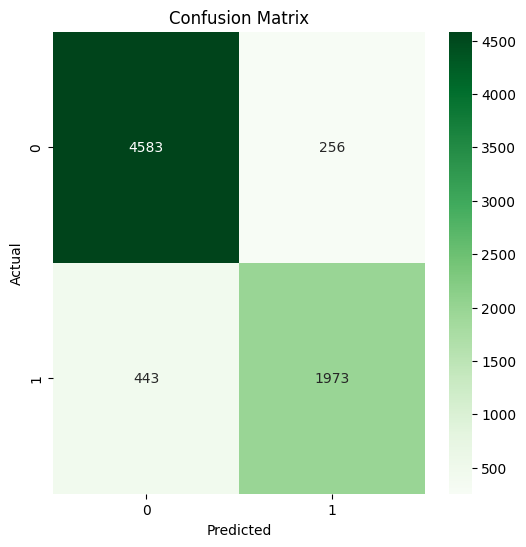

In [140]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## XGBoost

In [43]:
from xgboost import XGBClassifier

In [141]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train_final, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [142]:
y_pred_xgb = xgb_model.predict(x_test_final)

In [143]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4839
           1       0.86      0.80      0.83      2416

    accuracy                           0.89      7255
   macro avg       0.88      0.87      0.87      7255
weighted avg       0.89      0.89      0.89      7255



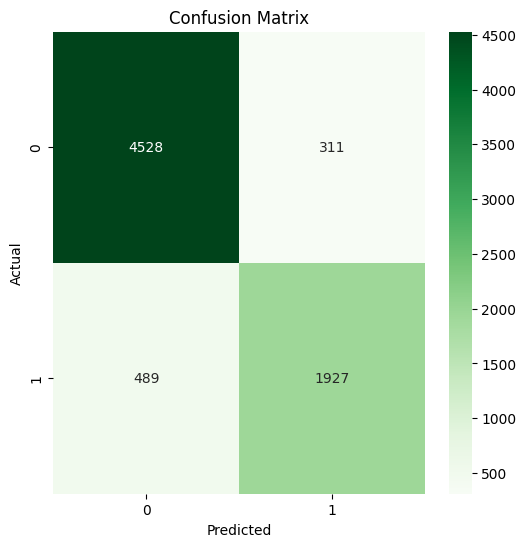

In [144]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6,6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Dari hasil evaluasi di atas, dapat dilihat bahwa model random forest memiliki akurasi yang lebih tinggi dibanding model xgb. Dengan macro avg recall dan precisionnya yang lebih tinggi (menunjukkan bahwa model random forest menghasilkan false negative dan false positive lebih sedikit dibanding model xgb). Oleh karena itu, model yang akan digunakan adalah model random forest

### Fine Tuning

Random Forest


In [91]:
from sklearn.model_selection import GridSearchCV

In [126]:
param = {
    'max_depth' : [10, 20, 30, 50],
    'n_estimators' : [100, 150, 200, 300],
    'min_samples_split' : [2, 5, 10, 15]
}
rf_model_ft = RandomForestClassifier(random_state=42)
grid_rf  = GridSearchCV(rf_model_ft, param_grid= param, cv = 5)
grid_rf.fit(x_train_final, y_train)

best_paramrf = grid_rf.best_params_

In [128]:
print(grid_rf.best_params_)

{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 150}


In [129]:
best_rf = grid_rf.best_estimator_
best_rf.fit(x_train_final, y_train)

RandomForestClassifier(max_depth=30, n_estimators=150, random_state=42)

In [130]:
y_predrf_ft = best_rf.predict(x_test_final)

In [131]:
print(classification_report(y_test, y_predrf_ft))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4839
           1       0.88      0.82      0.85      2416

    accuracy                           0.90      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255



XGB Model


In [118]:
xgb_model_ft = XGBClassifier(random_state=125)

param_grid_xgb = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 7, 10],
    'learning_rate': [0.5, 0.1, 0.2],
}

grid_xgb = GridSearchCV(
    xgb_model_ft,
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=5
)

grid_xgb.fit(x_train_final, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=125, ...),
             param_grid={'learning_rate': [0.5, 0.1, 0.2],
                         'max_depth': [5, 7, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy')

In [119]:
print(grid_xgb.best_params_)

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}


In [120]:
best_xgb = grid_xgb.best_estimator_
best_xgb.fit(x_train_final, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=125, ...)

In [121]:
y_predxgb_ft = best_xgb.predict(x_test_final)

In [122]:
print(classification_report(y_test, y_predxgb_ft))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      4839
           1       0.87      0.82      0.85      2416

    accuracy                           0.90      7255
   macro avg       0.89      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255



Dari hasil fine tuning di atas dapat dilihat bahwa:
1. Model baseline Random Forest tidak mengalami peningkatan setelah dilakukan fine tuning (akurari tetap 0.9).
2. Model XGBoost mengalami peningkatan setelah di fine tune (dari akurasi 0.89 menjadi 0.9 dan precision dan recall yang meningkat).

Kesimpulan : Model terbaik adalah model random forest tanpa dilakukan fine tuning dengan akurasi 0.9. Saya tidak memilih model fine tuned XGBoost karena nilai akurasinya sama dengan baseline random forest dan nilai macro avg precision milik baseline random forest lebih tinggi dibanding milik fine tuned XGBoost(mengindikasi nilai false positive sedikit)

## Menyimpan model dalam pickle

In [145]:
import pickle as pkl

In [146]:
filename = 'RF_hotel.pkl'
pkl.dump(rf_model, open(filename, 'wb'))